=== 入力データの例 ===
tensor([[14.3708, 14.2382, 18.7471, 17.8306, 24.2436, 23.4600, 18.4199,  9.4239,
         21.6114, 13.6833],
        [21.7499, 21.5407, 20.5992, 26.1883, 25.5839, 18.7636, 13.2367, 11.5203,
         22.8333, 23.9675],
        [22.9942, 12.2245, 18.2932, 29.2650, 18.9207, 16.2873, 22.8136, 21.2981,
         19.1302, 16.6063],
        [24.6913, 22.4443, 26.0161, 20.4227, 13.9993, 19.9761, 17.4096, 18.4665,
         12.0950, 28.5332]])

=== 平均と分散の比較 ===
Before normalization: mean=tensor([17.6029, 20.5983, 19.7833, 20.4054]), var=tensor([22.2808, 23.8481, 21.6147, 27.0097])
After normalization : mean=tensor([-2.6226e-07,  0.0000e+00,  4.7386e-07,  9.2387e-08],
       grad_fn=<MeanBackward1>), var=tensor([1.1111, 1.1111, 1.1111, 1.1111], grad_fn=<VarBackward0>)


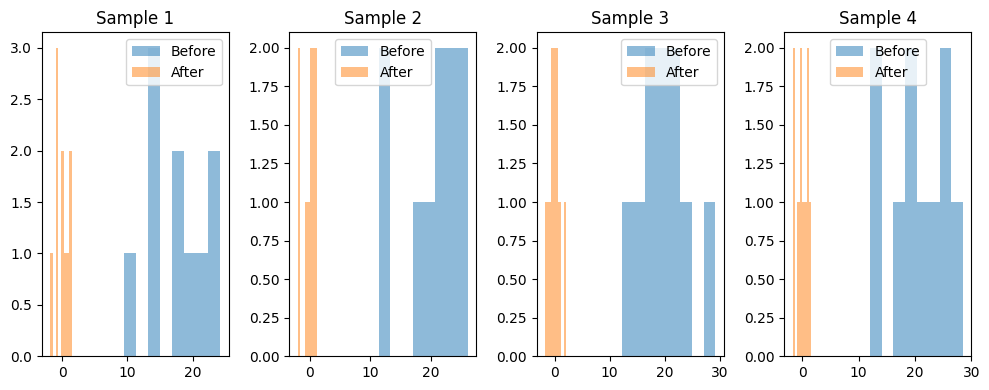

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# ====== 1. 入力データを準備 ======
torch.manual_seed(0)
x = torch.randn(4, 10) * 5 + 20   # バッチサイズ4, 特徴数10
print("=== 入力データの例 ===")
print(x)

# ====== 2. LayerNormを適用 ======
layer_norm = nn.LayerNorm(10)
y = layer_norm(x)

# ====== 3. 統計を比較 ======
print("\n=== 平均と分散の比較 ===")
print(f"Before normalization: mean={x.mean(dim=1)}, var={x.var(dim=1)}")
print(f"After normalization : mean={y.mean(dim=1)}, var={y.var(dim=1)}")

# ====== 4. 可視化 ======
plt.figure(figsize=(10,4))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.hist(x[i].detach().numpy(), bins=8, alpha=0.5, label='Before')
    plt.hist(y[i].detach().numpy(), bins=8, alpha=0.5, label='After')
    plt.title(f'Sample {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()
